# CASE STUDY EQUITY VANILLA OPTION

Case study for Hyderabad Conference December 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.products.equity import *
from financepy.market.curves import *

####################################################################
# FINANCEPY BETA Version 0.186 - This build:  01 Dec 2020 at 13:21 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



## Creating the Equity Vanilla Call Option

We need to set up the option details - what you would find in the Term Sheet.

In [3]:
expiryDate = FinDate(1, 6, 2021)

In [4]:
strikePrice = 100.0

We now create the option object

In [5]:
callOption = FinEquityVanillaOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_CALL)

In [6]:
print(callOption)

OBJECT TYPE: FinEquityVanillaOption
EXPIRY DATE: 01-JUN-2021
STRIKE PRICE: 100.0
OPTION TYPE: FinOptionTypes.EUROPEAN_CALL
NUMBER: 1.0


## Valuation

To do a valuation we need to specify the date and set the market inputs

In [7]:
valueDate = FinDate(6, 12, 2020)

In [8]:
stockPrice = 90.0

In [9]:
dividendYield = 0.01

In [10]:
interestRate = 0.02

In [11]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate, FinFrequencyTypes.ANNUAL)

The valuation model we use is Black-Scholes which is passed in as a Black-Scholes model object. It is created as follows.

In [12]:
volatility = 0.20
model = FinModelBlackScholes(volatility)

The valuation is as follows

In [13]:
callOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)

1.801680685204456

### Spot Price Dependency

We can examine how the option value depends on the spot price

In [14]:
stockPrices = np.linspace(60,140,100)
values = callOption.value(valueDate, stockPrices, discountCurve, dividendYield, model)

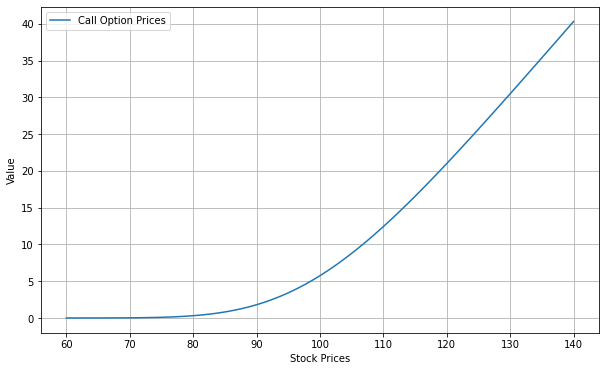

In [15]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices,values, label="Call Option Prices")
plt.xlabel("Stock Prices")
plt.ylabel("Value")
plt.legend()
plt.grid()

### Volatility Dependency

We can see how the value depends on volatility

In [16]:
volatilities = np.linspace(0.01,10,100)
models = FinModelBlackScholes(volatilities)
values = callOption.value(valueDate, stockPrice, discountCurve, dividendYield, models)

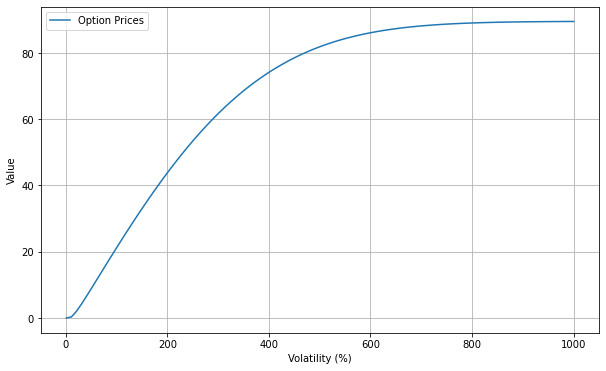

In [17]:
plt.figure(figsize=(10,6))
plt.plot(volatilities*100,values, label="Option Prices")
plt.xlabel("Volatility (%)")
plt.ylabel("Value")
plt.legend()
plt.grid()

### Strike Price Dependency

Also strikes. 

In [18]:
strikePrices = np.linspace(70,130,50)

But as these are part of the option description - so we need to first vectorise those.

In [19]:
callOptions = FinEquityVanillaOption(expiryDate, strikePrices, FinOptionTypes.EUROPEAN_CALL)

Look, we have an array of callOptions with different strikes

In [20]:
callOptions._strikePrice

array([ 70.        ,  71.2244898 ,  72.44897959,  73.67346939,
        74.89795918,  76.12244898,  77.34693878,  78.57142857,
        79.79591837,  81.02040816,  82.24489796,  83.46938776,
        84.69387755,  85.91836735,  87.14285714,  88.36734694,
        89.59183673,  90.81632653,  92.04081633,  93.26530612,
        94.48979592,  95.71428571,  96.93877551,  98.16326531,
        99.3877551 , 100.6122449 , 101.83673469, 103.06122449,
       104.28571429, 105.51020408, 106.73469388, 107.95918367,
       109.18367347, 110.40816327, 111.63265306, 112.85714286,
       114.08163265, 115.30612245, 116.53061224, 117.75510204,
       118.97959184, 120.20408163, 121.42857143, 122.65306122,
       123.87755102, 125.10204082, 126.32653061, 127.55102041,
       128.7755102 , 130.        ])

Then we can get back a vector of values

In [21]:
callValues = callOptions.value(valueDate, stockPrice, discountCurve, dividendYield, model)

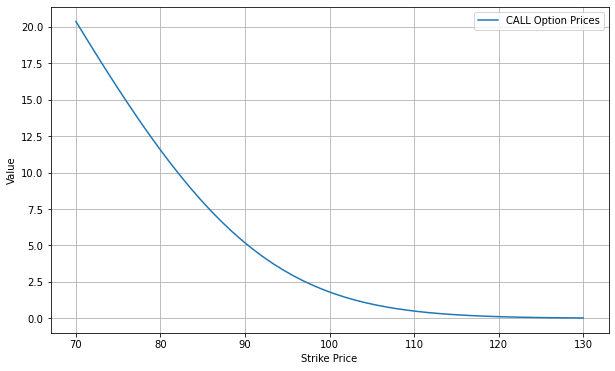

In [22]:
plt.figure(figsize=(10,6))
plt.plot(strikePrices, callValues, label="CALL Option Prices")
plt.xlabel("Strike Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Risk Sensitivities

In [23]:
callDeltas = callOption.delta(valueDate, stockPrices, discountCurve, dividendYield, model)

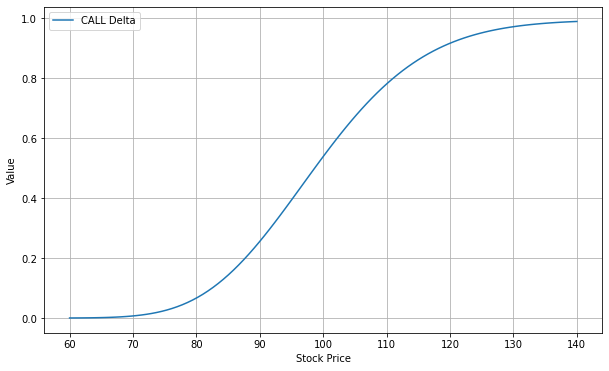

In [24]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices, callDeltas, label="CALL Delta")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [25]:
callGammas = callOption.gamma(valueDate, stockPrices, discountCurve, dividendYield, model)

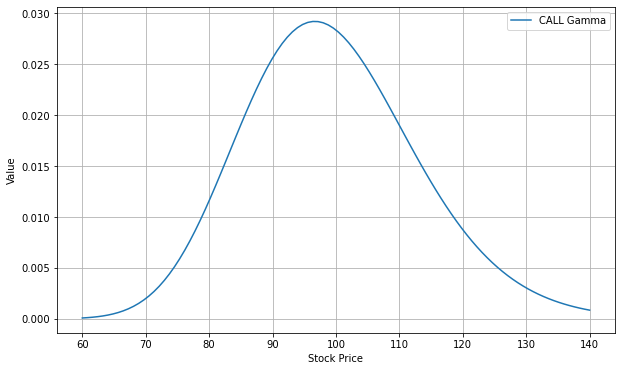

In [26]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices, callGammas, label="CALL Gamma")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [27]:
callVegas = callOption.vega(valueDate, stockPrices, discountCurve, dividendYield, model)

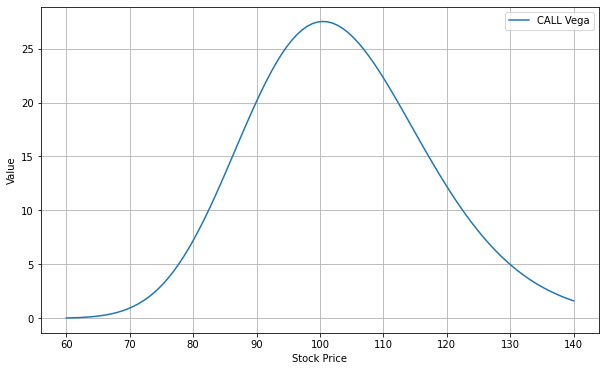

In [28]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices, callVegas, label="CALL Vega")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [29]:
callThetas = callOption.theta(valueDate, stockPrices, discountCurve, dividendYield, model)

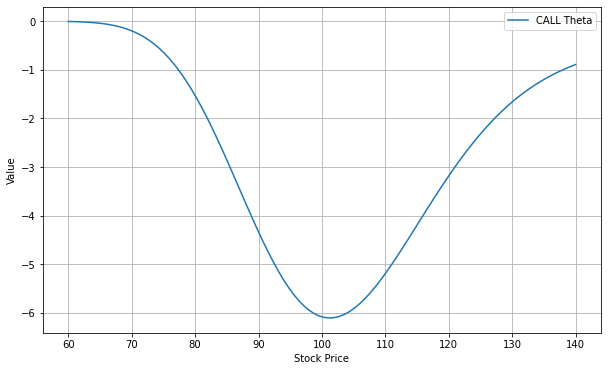

In [30]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices, callThetas, label="CALL Theta")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

Copyright (c) 2020, Dominic O'Kane 